In [63]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

In [64]:
def draw(G, node_color, edge_color):
    pos = nx.shell_layout(G)
    edge_lab = {(u,v):G[u][v]['weight'] for u,v in G.edges()}
    node_lab = {i for i in G.nodes()}
    plt.figure(figsize=(6,6))
    nx.draw_networkx_edge_labels (G, pos, edge_labels=edge_lab)
    nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color=edge_color, node_size=500)

In [65]:
G = nx.DiGraph()

source = 0
terminal = 5

nodes = [0, 1, 2, 3, 4, 5]
edges = [(0,1,4), (0,2,1), (1,2,2), (1,3,3), (2,4,2), (3,2,2), (3,5,2), (4,1,1),(4,5,3)]
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)



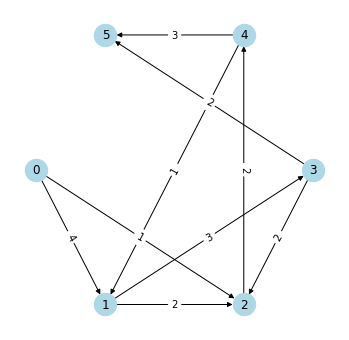

In [66]:
draw(G, "lightblue", "black")

In [67]:
shortest_path = gb.Model()

In [68]:
#Variables 

x = shortest_path.addVars(G.edges(), 
                        obj=[G[u][v]['weight'] for u,v in G.edges()],
                        vtype=gb.GRB.BINARY, 
                        name='x')

shortest_path.update()
shortest_path.write('shortest_path.lp')

In [72]:
shortest_path.addConstr(x.sum(source,'*') == 1, name="s_out_edges")
shortest_path.addConstr(x.sum('*', terminal) == 1, name="s_out_edges")

shortest_path.update()
shortest_path.write('shortest_path.lp')

###TO FINISH